In [1]:
import tensorflow as tf
from helper.dataloader import MNIST
from output.cgan.cgan_test import cgan
from classifier import ConvNet
from helper import utils
import numpy as np
from differences import diff
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import HTML, display
import tabulate

In [2]:
tf.reset_default_graph()
sess = tf.InteractiveSession()
model = cgan.CGAN(sess, hp_file='./output/cgan/cgan_test/config.pkl')
model.restore('./output/cgan/cgan_test/checkpoints')

Restore model from ./output/cgan/cgan_test/checkpoints
INFO:tensorflow:Restoring parameters from ./output/cgan/cgan_test/checkpoints\CGAN-255528


True

In [7]:
# buat label untuk generate
jumlah_label = [10, 10, 10, 10, 10, 10, 10, 10, 10, 10]
labels, y = utils.create_labels(jumlah_label)  # labels=one hot vector
# labels, y

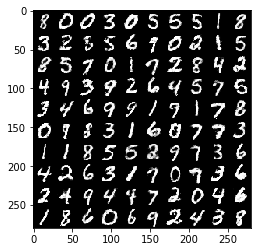

In [13]:
np.random.shuffle(labels)
samples = model.sample(labels)
size = int(np.ceil(np.sqrt(len(labels))))
gambar = model._join_imgs((samples * 2.) - 1., (size, size)) if len(labels) > 0 else samples
plt.imshow(gambar, cmap='Greys_r')

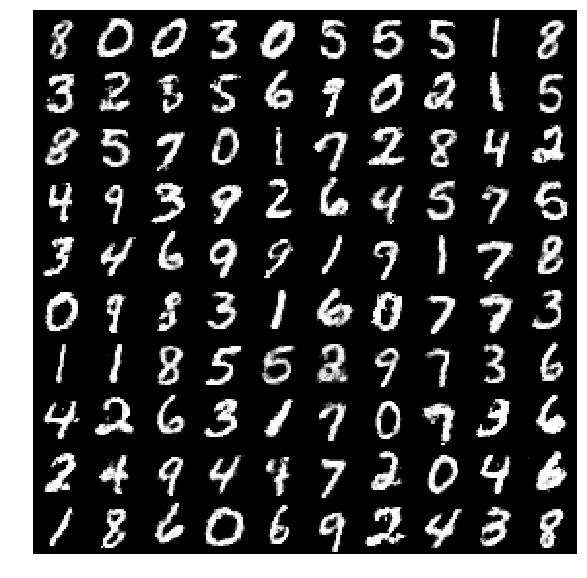

In [15]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.axis("off")
ax.imshow(gambar, cmap="Greys_r")

In [5]:
tf.reset_default_graph()
# akurasi
sess = tf.Session()
convnet = ConvNet(sess)
convnet.sess.run(tf.global_variables_initializer())
convnet.restore('./output/classifier/10k-iter')

Restore model from ./output/classifier/10k-iter
INFO:tensorflow:Restoring parameters from ./output/classifier/10k-iter\ConvNet-9901


True

In [6]:
test_gambar = samples.reshape((-1, 784))
convnet.test(test_gambar, labels)

0.99000001

In [7]:
# cek diff
sampling = 1.
step = int(1. / sampling)
print('step', step)
x = range(0, len(samples), step)
print('cek', len(x), 'dari', len(samples))
gambar = np.array([samples[i] for i in x])
y_ = [y[i] for i in x]
gambar = gambar.reshape((-1, 784))
result = diff(gambar, y_, to_string=False)
display(HTML(tabulate.tabulate(result[0], tablefmt='html')))
display(HTML(tabulate.tabulate(result[1], tablefmt='html')))

step 1
cek 100 dari 100
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz

=== [ start: 09 Jul 2018 20:47:15 ] ===
100 / 100 |##################################################| 100.0% 70000 dari 70000 digit mnist

Calculation finished in  1h  7m 48.9466s
